Saving mental_health_workplace_survey.csv to mental_health_workplace_survey (2).csv
['BurnoutLevel', 'StressLevel', 'ManagerSupportScore']


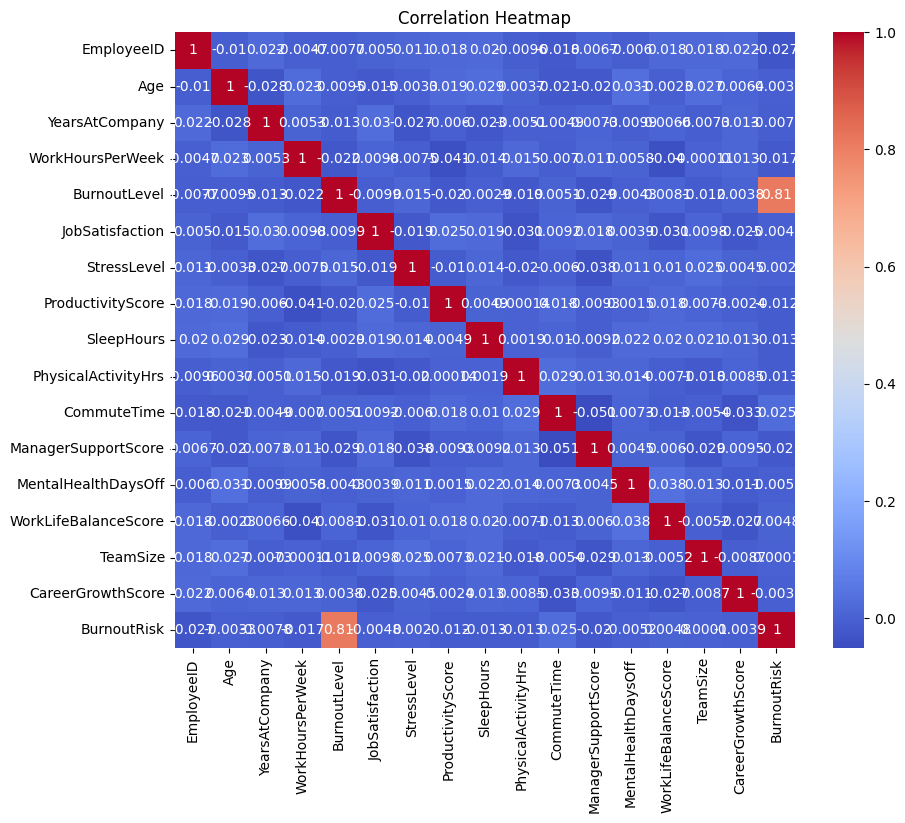

Minimal-Model Accuracy: 1.00
Confusion Matrix:

[[399   0]
 [  0 201]]
BurnoutLevel selected due to high feature importance contribution.
StressLevel selected due to high feature importance contribution.
ManagerSupportScore selected due to high feature importance contribution.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import files


uploaded = files.upload()
df = pd.read_csv('mental_health_workplace_survey.csv')


x = df.drop('BurnoutRisk', axis=1)
y = df['BurnoutRisk']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,test_size=0.2, random_state=42)


categorical_cols = x_train.select_dtypes(include='object').columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(x_train[categorical_cols])

x_train_encoded = pd.DataFrame(encoder.transform(x_train[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols),index=x_train.index)

x_test_encoded = pd.DataFrame(encoder.transform(x_test[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols),index=x_test.index)


numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
x_train_num = x_train[numerical_cols]
x_test_num = x_test[numerical_cols]

x_train_final = pd.concat([x_train_encoded, x_train_num], axis=1)
x_test_final = pd.concat([x_test_encoded, x_test_num], axis=1)


scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_final),index=x_train.index,columns=x_train_final.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test_final),index=x_test.index,columns=x_test_final.columns)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train_scaled, y_train)
feature_importance = pd.Series(random_forest.feature_importances_, index=x_train_scaled.columns)

top_features = feature_importance.sort_values(ascending=False).head(3).index.tolist()
print(top_features)

plt.figure(figsize=(10, 8))
numeric = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

x_train_minimal = x_train_scaled[top_features]
x_test_minimal = x_test_scaled[top_features]

minimal_model = RandomForestClassifier(random_state=42)
minimal_model.fit(x_train_minimal, y_train)
y_pred_minimal = minimal_model.predict(x_test_minimal)

accuracy = accuracy_score(y_test, y_pred_minimal)
conf_matrix = confusion_matrix(y_test, y_pred_minimal)

print(f"Minimal-Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n")
print(conf_matrix)

for feature in top_features:
    print(f"{feature} selected due to high feature importance contribution.")

